In [68]:
# Lets test the IBM Quantum API
# First of all, import the necessary modules

# I am using IBM's quantum computing SDK and API in python.
# You can get it here: https://github.com/IBM/qiskit-sdk-py
# To use the API, you need a IBM QX account, which is free at
# https://quantumexperience.ng.bluemix.net/qx

import sys
# solve the relative dependencies if you clone QISKit from the Git repo and use like a global.
sys.path.append("../../qiskit-sdk-py")

from qiskit import QuantumProgram
from tools import visualization
import Qconfig

In [56]:
# ##############################################################
# Creating The Program
# Create your first QuantumProgram object instance.
# ##############################################################
n = 3
QPS_SPECS = {
    "circuits": [{
        "name": "qc",
        "quantum_registers": [{
            "name": "qr",
            "size": n
        }],
        "classical_registers": [
            {"name": "cr",
             "size": n}
        ]}]
}

qp = QuantumProgram(specs=QPS_SPECS)

In [57]:
# Get the circuit by Name
circuit = qp.get_circuit("qc")
dicted = circuit.__dict__
print(dicted)

{'data': [], 'regs': OrderedDict([('qr', <qiskit._quantumregister.QuantumRegister object at 0x000002678D32C9B0>), ('cr', <qiskit._classicalregister.ClassicalRegister object at 0x000002678D32C710>)])}


In [58]:
qRegister = circuit.regs['qr']
cRegister = circuit.regs['cr']
print(qRegister, cRegister)

QuantumRegister(qr,3) ClassicalRegister(cr,3)


In [59]:
# First, we apply the Hadamard gates to every qubit
# Now, all the possible states are equally likely to be observed
for i in range(n):
    circuit.h(qRegister[i]) 

In [60]:
# With every possible state, we will apply the Oracle*. In this case,
# To make a constant function, you can either comment out the below oracle
# or make your own constant function!
# *an oracle analogous to calling a function in a classical computer. Note
# that for a different function, a new oracle needs to be built.
circuit.z(qRegister[0])
circuit.cz(qRegister[1], qRegister[2])

In [61]:
# Now, we apply the H-gate to all the qubits again.
for i in range(n):
    circuit.h(qRegister[i])

COMPLETED
{'101': 258, '001': 254, '011': 244, '111': 268}


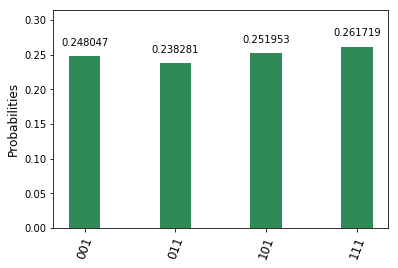

In [70]:
# That's it for this algorithm! Measure the qubits into the classical registers.
# For a constant function, we expect a 100% chance of observing all 0s. (if simulated)
# For a balanced function, we expect anything else.
# This means that when we examine the probability of measuring all 0s, we get 1 for a constant
# function (due to constructive interference) and 0 for a balanced function (destructed interference).
# This is a deterministic algorithm.
# The math behind this algorithm is on IBM's QX Full user guide:
# https://quantumexperience.ng.bluemix.net/qx/tutorial?sectionId=8443c4f713521c10b1a56a533958286b&pageIndex=3
# The biggest resource that helped my understand constructive/destructive interference in the algorithm was this video:
# https://www.youtube.com/watch?v=mGqyzZ-fnnY
# This algorithm can evaluate the function in one call, which is exponentially faster than
# a classical computer's 2^(n-1) + 1.
circuit.measure(qRegister[0], cRegister[0])
circuit.measure(qRegister[1], cRegister[1])
circuit.measure(qRegister[2], cRegister[2])
# Set the API
qp.set_api(Qconfig.APItoken, Qconfig.config["url"])
# Backend to execute your program, in this case it is the online simulator
device = 'ibmqx_qasm_simulator'
# Group of circuits to execute
circuits = ["qc"]  
# Execute your program
# Run your program in the device (5 times prove its randomness). First version: not mapped.
for i in range(1):
    result = qp.execute(circuits, backend=device,
                        coupling_map=None, shots=1024)
    print(result)
    print(result.get_counts(circuits[0]))
    visualization.plot_histogram(result.get_counts(circuits[0]))
